In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
path="/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 13bce0104
 201811069_Resume.gdoc
 201811069_resume.pdf
 201811069_Resume.pdf
'aadhar card.docx'
 Apti
'assignment data'
'Colab Notebooks'
'Copy of DM _lab_00.py'
 CS18S35020085scoreCard.pdf
 CUB_200_2011
 Data_Preprocessing.ipynb
'DLI C-FX-01 Certificate _ Deep Learning Institute.pdf'
'DM _lab_00.py'
 ex2data1-logistic.xls
 faceimages.mat
'final groups.xlsx'
 groups
 image_captioning
'IT314-SE 2019 Attendance.gsheet'
'IT485 Project Group.xlsx'
 lab3_2.ipynb
 lingspam_public
 lingspam_public.tar.gz
'suesha gupta CV.doc'
'Suesha Gupta Internship letter.pdf'


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
#from sklearn.learning_curve import learning_curve
import glob
import errno

In [0]:
def ret(loc):
    path =loc
    files = glob.glob(path)
    lst=[]
    for fname in files:
        try:
            with open(fname,'r') as f:
                lines = f.readlines()
                str = '' 
                for i in range(2,len(lines)):
                    str += lines[i].rstrip('\n') 
                    lst.append(str)
                f.close()
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    return lst

In [0]:
data1=ret(path+'lingspam_public/bare/bare/part1/3*.txt')
#ham=ret('/Users/abc/Desktop/machine learning/Models vectors/spam filter/Spam Dataset/Ham emails/*.txt')
print(len(data1))
df1 = pd.DataFrame({'mail':data1})
data2=ret(path+'lingspam_public/bare/bare/part1/5*.txt')
print(len(data2))
df2 = pd.DataFrame({'mail':data2})
data3=ret(path+'lingspam_public/bare/bare/part1/spm*.txt')
spam=pd.DataFrame({'mail':data3})
print(len(spam))
ham=pd.concat([df1,df2],axis=0,ignore_index=True)
len(ham)
spam['type']=1
ham['type']=0
datap1=pd.concat([spam,ham],axis=0,ignore_index=True)
print(datap1.shape)


143
98
48
(289, 2)


In [0]:
data1=ret(path+'lingspam_public/bare/bare/part2/5*.txt')
#ham=ret('/Users/abc/Desktop/machine learning/Models vectors/spam filter/Spam Dataset/Ham emails/*.txt')
print(len(data1))
df1 = pd.DataFrame({'mail':data1})
data2=ret(path+'lingspam_public/bare/bare/part2/6*.txt')
print(len(data2))
df2 = pd.DataFrame({'mail':data2})
data3=ret(path+'lingspam_public/bare/bare/part2/spm*.txt')
spam=pd.DataFrame({'mail':data3})
print(len(spam))
ham=pd.concat([df1,df2],axis=0,ignore_index=True)
len(ham)
spam['type']=1
ham['type']=0
datap2=pd.concat([spam,ham],axis=0,ignore_index=True)
print(datap2.shape)

194
47
48
(289, 2)


In [0]:
data1=ret(path+'lingspam_public/bare/bare/part3/6*.txt')
#ham=ret('/Users/abc/Desktop/machine learning/Models vectors/spam filter/Spam Dataset/Ham emails/*.txt')
print(len(data1))
df1 = pd.DataFrame({'mail':data1})

data3=ret(path+'lingspam_public/bare/bare/part3/spm*.txt')
spam=pd.DataFrame({'mail':data3})
print(len(spam))
#ham=pd.concat([df1,df2],axis=0,ignore_index=True)
len(ham)
spam['type']=1
ham['type']=0
datap3=pd.concat([spam,df1],axis=0,ignore_index=True)
print(datap3.shape)

241
48
(289, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [0]:
data1=ret(path+'lingspam_public/bare/bare/part4/6*.txt')
#ham=ret('/Users/abc/Desktop/machine learning/Models vectors/spam filter/Spam Dataset/Ham emails/*.txt')
print(len(data1))
df1 = pd.DataFrame({'mail':data1})
data2=ret(path+'lingspam_public/bare/bare/part4/8*.txt')
print(len(data2))
df2 = pd.DataFrame({'mail':data2})
data3=ret(path+'lingspam_public/bare/bare/part4/spm*.txt')
spam=pd.DataFrame({'mail':data3})
print(len(spam))
ham=pd.concat([df1,df2],axis=0,ignore_index=True)
len(ham)
spam['type']=1
ham['type']=0
datap4=pd.concat([spam,ham],axis=0,ignore_index=True)
print(datap4.shape)

209
32
48
(289, 2)


In [0]:
data1=ret(path+'lingspam_public/bare/bare/part5/8*.txt')
#ham=ret('/Users/abc/Desktop/machine learning/Models vectors/spam filter/Spam Dataset/Ham emails/*.txt')
print(len(data1))
df1 = pd.DataFrame({'mail':data1})
data2=ret(path+'lingspam_public/bare/bare/part5/9*.txt')
print(len(data2))
df2 = pd.DataFrame({'mail':data2})
data3=ret(path+'lingspam_public/bare/bare/part5/spm*.txt')
spam=pd.DataFrame({'mail':data3})
print(len(spam))
ham=pd.concat([df1,df2],axis=0,ignore_index=True)
len(ham)
spam['type']=1
ham['type']=0
datap5=pd.concat([spam,ham],axis=0,ignore_index=True)
print(datap5.shape)

59
183
48
(290, 2)


In [0]:
data=pd.concat([datap1,datap2,datap3,datap4,datap5],axis=0,ignore_index=True)
print(data.shape)

(1446, 2)


In [0]:
data=data.drop_duplicates(subset=['mail'])
data.shape #25 duplicates mail

(1439, 2)

In [0]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))#english.txt file has stopwords
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'than', 'there', 'me', 'do', 'nor', 'ours', 'having', 'below', 'until', 'have', 'this', 'during', 'through', 'now', 've', "it's", 'here', 'his', 'few', "didn't", 'yourself', 'its', 'am', "shan't", 'it', 'very', "you'd", 'and', "weren't", 'is', 'own', "you'll", 'these', 'same', "needn't", 'at', 'she', 'm', 'her', 'themselves', 'or', 'into', 'don', 'shouldn', 'against', 'because', 'why', 'doing', 'haven', 'needn', 'o', 'yours', 'all', 'won', "doesn't", 'when', 'shan', 'both', 'how', "don't", 'weren', 'should', 'to', 'out', 'then', 'hers', 'while', "hadn't", 'isn', 'ain', 'our', "you're", 'once', 'them', 'each', 'most', 'that', 'after', 'itself', 'from', "mightn't", 'where', 'theirs', 'what', "won't", 'about', "wouldn't", 'above', 'll', "that'll", 'down', 'hasn', 'been', 'being', 'in', 's', 'd', 'mustn', 'who', 'before', 'by', 'he', "you've", 'those', 'further', 'wasn', "haven't

In [0]:
lst = ["wouldn't",'won', 'nor', 'not', 'against',"doesn't","don't"] #to remove these words from english.txt file
for word in lst:
    stop.remove(word)
print(stop)

{'than', 'there', 'me', 'do', 'ours', 'having', 'below', 'until', 'have', 'this', 'during', 'through', 'now', 've', "it's", 'here', 'his', 'few', "didn't", 'yourself', 'its', 'am', "shan't", 'it', 'very', "you'd", 'and', "weren't", 'is', 'own', "you'll", 'these', 'same', "needn't", 'at', 'she', 'm', 'her', 'themselves', 'or', 'into', 'don', 'shouldn', 'because', 'why', 'doing', 'haven', 'needn', 'o', 'yours', 'all', 'when', 'shan', 'both', 'how', 'weren', 'should', 'to', 'out', 'then', 'hers', 'while', "hadn't", 'isn', 'ain', 'our', "you're", 'once', 'them', 'each', 'most', 'that', 'after', 'itself', 'from', "mightn't", 'where', 'theirs', 'what', "won't", 'about', 'above', 'll', "that'll", 'down', 'hasn', 'been', 'being', 'in', 's', 'd', 'mustn', 'who', 'before', 'by', 'he', "you've", 'those', 'further', 'wasn', "haven't", 'himself', 'you', "shouldn't", "hasn't", 'some', 'hadn', 'my', "wasn't", "couldn't", 'myself', 'just', 'had', 'of', "aren't", 're', 'an', 'yourselves', 'him', 'herse

In [0]:
sno = nltk.stem.SnowballStemmer('english') #english stemmer
sno.stem("caring")

'care'

In [0]:
import re
from nltk.corpus import stopwords
import nltk 
#removal of html tags
def cleanhtml(sent):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr,' ',sent)
    return cleantext

In [0]:
#removal of punctuation tags
def cleanpunc(sent):
    cleaned=re.sub(r'[?|@|!|^|%|\'|"|#|$|:|*|+|-|=|\-|&|_]',r'',sent)
    cleaned=re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [0]:
def preprocessing(series):
    
    i = 0
    str1=" "
    final_string = []    ## This list will contain cleaned sentences
    list_of_sent = []    ## This is a list of lists used as input to the W2V model at a later stage
    
    ## Creating below lists for future use
    all_positive_words=[] # store words from spam mail here
    all_negative_words=[] # store words from ham mail here
    

    for sent in series.values:
        filtered_sent=[]
        sent=cleanhtml(sent)
        sent=cleanpunc(sent)
        
        for clean_word in sent.split():
            if((clean_word.isalpha()) and (len(clean_word)>2)):
                if(clean_word.lower() not in stop):
                    s=(sno.stem(clean_word.lower()))
                    s=clean_word.lower()
                    filtered_sent.append(s)
                    if(data['type'].values)[i]==1:
                        all_positive_words.append(s)
                    if(data['type'].values)[i]==0:
                        all_negative_words.append(s)
                        
        list_of_sent.append(filtered_sent)
        str1=' '.join(filtered_sent)
        final_string.append(str1)
        i+=1
    return final_string,list_of_sent


In [0]:
final_string,list_of_sent=preprocessing(data['mail'])
print(data['mail'])

0       dear nlpeople , i ' m sure you ' ll agree auto...
1       * * * * * * * * * * * * * * * we have display ...
2       attention ! warning ! adults only ! warning ! ...
3       if you want the best hunting and camping vacat...
4       57 million email addresses for only $ 99 you w...
5       make $ 3500 per week using your home computer ...
6       hi . my name is dennis . i am a third-generati...
7       attention ! warning ! adults only ! warning ! ...
8       * have you ever got a speeding ticket and need...
9       from the desk of robert g . allen dear nlpeopl...
10      subject : re : are you in debt ? if you are th...
11      = = = = = = = = = = = = = = = = = = = = = = = ...
12      57 million email addresses for only $ 99 you w...
13      the 2 newest and hottest interactive adult web...
14      special : work from home , sell successfully a...
15      it was just released ! ! introducing . . . mil...
16      hey , i ' ll just get to the point . i have a ...
17      the ru

In [0]:
data['cleaned_mail_stem']=final_string
print(data.shape)
#data.head(10)
data.dropna()
data.dropna(axis='columns')
data.shape
data = data.fillna(method='ffill')

(1439, 3)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['cleaned_mail_stem'])
sp_arr = csr_matrix(vectors)
sdf = pd.SparseDataFrame(sp_arr,default_fill_value=0)
print(sdf.head())
print(vectors.shape)
vectors[0][0]

   0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ...    38133  38134  38135  38136  38137  38138  38139  38140  38141  38142  
0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 38143 columns]
(1439, 38143)


<1x38143 sparse matrix of type '<class 'numpy.float64'>'
	with 98 stored elements in Compressed Sparse Row format>

In [0]:
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(data['cleaned_mail_stem'].values)
sp_arr1 = csr_matrix(bow)
sdfb = pd.SparseDataFrame(sp_arr1,default_fill_value=0)
#print(sdfb.head())
x=bow  
y=data['type'].values


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Xb_train, Xb_test, yb_train, yb_test = train_test_split(sdfb, data['type'], test_size=0.20, random_state=111)


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(sdf, data['type'], test_size=0.20, random_state=111)

In [0]:

print (X_train)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)



X_train.shape

         0      1      2      3      4      5      6      7        8      \
699   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
354   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
564   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
484   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
106   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
1081  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
1423  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
407   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
961   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
125   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
768   0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
1280  0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.00000   
633   0.0000

(1151, 38143)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
svc = SVC(kernel='linear', gamma=1.0)
#knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
#dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
#lrc = LogisticRegression(solver='liblinear', penalty='l1')
#rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [0]:
clfs = {'SVC' : svc, 'NB':mnb}

In [0]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [0]:
from sklearn.metrics import accuracy_score #works
pred_scoresbag_word_vectors = []
predbag =dict()
for k,v in clfs.items():
    train(v, Xb_train, yb_train)
    pred = predict(v, Xb_test)
    predbag[k]=pred
    pred_scoresbag_word_vectors.append((k, [accuracy_score(yb_test , pred)]))
#predbag['SVC']


In [0]:
from sklearn.metrics import accuracy_score #works
pred_scores_word_vectors = []
prednew =dict()
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    print(pred)
    prednew[k]=pred
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))
#prednew['SVC']


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1

In [0]:
predictionsbag = pd.DataFrame.from_items(pred_scoresbag_word_vectors,orient='index', columns=['Score'])


print(predictionsbag)

        Score
SVC  0.708333
NB   0.774306


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
for k,v in clfs.items():
  print(confusion_matrix(y_test, prednew[k]))
  print(precision_recall_fscore_support(y_test, prednew[k],average='macro')) #for Tf-Idf using svm and logistic_regression

[[192   5]
 [ 48  43]]
(0.8479166666666667, 0.723573380933787, 0.7487117857201653, None)
[[193   4]
 [ 45  46]]
(0.8654621848739497, 0.7425949684832933, 0.7699192956713132, None)


In [0]:

predictions = pd.DataFrame.from_items(pred_scores_word_vectors,orient='index', columns=['Score'])


print(predictions)

        Score
SVC  0.815972
NB   0.829861


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
for k,v in clfs.items():
  print(confusion_matrix(yb_test, predbag[k]))
  print(precision_recall_fscore_support(yb_test, predbag[k],average='macro'))#for CountVectorizer in svm and logistic Regression
  

[[151  46]
 [ 38  53]]
(0.6671476671476672, 0.6744575221732583, 0.6701390782656123, None)
[[164  33]
 [ 32  59]]
(0.739019520851819, 0.7404194789981593, 0.7397071705668878, None)


In [0]:
def find(p):
    if p == 1:
        print ("E-mail is SPAM")
    else:
        print ("E-mail is NOT Spam")

In [0]:
text = ["Free tones Hope you enjoyed your new content"]
integers = bow_vect.transform(text)
sp_arr2 = csr_matrix(integers)
sdf2 = pd.SparseDataFrame(sp_arr2,default_fill_value=0)
p = svc.predict(sdf2)[0]
find(p)

E-mail is SPAM


In [0]:
text = ["Free tones Hope you enjoyed your new content"]
integers = vectorizer.transform(text)
sp_arr1 = csr_matrix(integers)
sdf1 = pd.SparseDataFrame(sp_arr1,default_fill_value=0)


In [0]:
p = svc.predict(sdf1)[0]
find(p)

E-mail is SPAM


In [0]:
cross_validation_svc=[]
cross_validation_svc=cross_val_score(svc, Xb_train, yb_train, cv=3, n_jobs=-1)#cross-validation using 3-folds by count vectorizer method using svm
print(np.mean(cross_validation_svc))
cross_validation_svc=[]
cross_validation_svc=cross_val_score(svc, Xb_train, yb_train, cv=5, n_jobs=-1)#cross-validation using 5-folds by count vectorizer method using svm
print(np.mean(cross_validation_svc))

0.7637109626665762


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7576284584980237


In [0]:
cross_validation_svc3=[]
cross_validation_svc3=cross_val_score(svc, X_train, y_train, cv=3, n_jobs=-1)
print(cross_validation_svc3)
acc3=np.mean(cross_validation_svc3)
print(acc3)
cross_validation_svc2=[]
cross_validation_svc2=cross_val_score(svc, X_train, y_train, cv=5, n_jobs=-1)#The number of CPUs to use to do the computation.
#None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
print(cross_validation_svc2)
acc1=np.mean(cross_validation_svc2)
print(acc1)
#cross-validation using 3-folds and 5-folds  by tf-idf using svm

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.81298701 0.83289817 0.81984334]
0.8219095091157754


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.81385281 0.84347826 0.82608696 0.82608696 0.80434783]
0.8227705627705628


In [0]:
cross_validation_lr1=[]
cross_validation_lr1=cross_val_score(mnb,X_train, y_train, cv=3, n_jobs=-1)
print(np.mean(cross_validation_lr1))
cross_validation_lr2=[]
cross_validation_lr2=cross_val_score(mnb, X_train, y_train, cv=5, n_jobs=-1)    
print(np.mean(cross_validation_lr2))
#cross-validation for naive-bayes using folds 3 and 5 for tf-idf

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.8236411108473772
0.8262337662337662


In [0]:
cross_validation_lr1=[]
cross_validation_lr1=cross_val_score(mnb, Xb_train, yb_train, cv=3, n_jobs=-1)
print(np.mean(cross_validation_lr1))
cross_validation_lr2=[]
cross_validation_lr2=cross_val_score(mnb, Xb_train, yb_train, cv=5, n_jobs=-1)
print(np.mean(cross_validation_lr2))
#cross-validation for naive-bayes using folds 3 and 5 for CountVectorizer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7862353486374373


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7784490871447394


        Score
SVC  0.815972
NB   0.829861


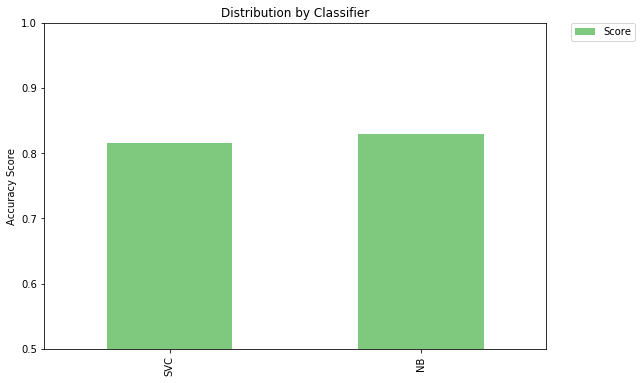

In [0]:
predictions.plot(kind='bar', ylim=(0.5,1.0), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(2), predictions.index)
print(predictions)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Distribution by classifier for TF-IDF

        Score
SVC  0.708333
NB   0.774306


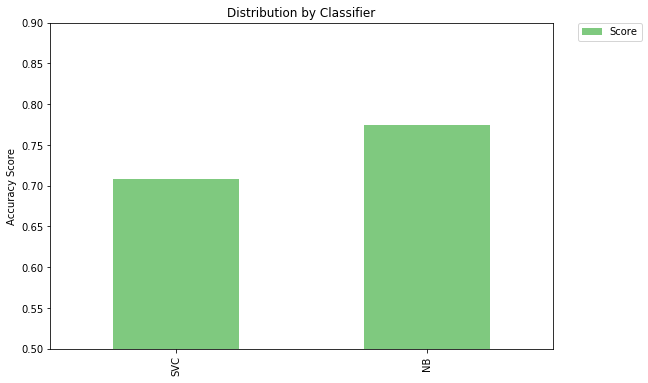

In [0]:
predictionsbag.plot(kind='bar', ylim=(0.5,0.9), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(2), predictions.index)
print(predictionsbag)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Distribution by classifier for CountVectorizer